<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_scores_csv = 'sat_scores.csv'

sat_scores_dic = {}
state = []
rate = []
verbal = []
math = []

with open(sat_scores_csv, 'r') as f:
    reader = csv.reader(f, delimiter = ',')
    for row in reader:
        if 'State' not in row:
            state.append(row[0])
            rate.append(row[1])
            verbal.append(row[2])
            math.append(row[3])
            
sat_scores_dic['State'] = state
sat_scores_dic['Rate'] = rate
sat_scores_dic['Math'] = math
sat_scores_dic['Verbal'] = verbal

print(sat_scores_dic)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
# make pandas dataframe using dictionary
sat_scores = pd.DataFrame(sat_scores_dic)
sat_scores.dtypes

State     object
Rate      object
Math      object
Verbal    object
dtype: object

In [4]:
# read csv file
sat = pd.read_csv(sat_scores_csv)
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


#### My observation:
##### When the csv file is read in using pandas read_csv, rate/verbal/math will automatically be imported as integers. Making a df object using the dictionary method will not achieve the same effect.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [6]:
sat.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


#### Comment: State=All needs to be removed from the dataframe. It makes no sense to include an aggregated row as it will affect distribution.

In [7]:
# exclude last row from dataframe
sat = sat.iloc[:51]
sat.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


#### Check that there are no duplicated states in State:

In [8]:
# 51 rows of data should return 51 unique states
len(sat['State'].unique())

51

### My inferences:
#### State = 50 states in US + 1 federal district - Washington D.C. (for the purpose of investigating scores, we shall not get into the politics of it and consider it a 'state')
#### Rate = participation rate in %
#### Verbal = average score for verbal
#### Math = average score for math

In [9]:
print('Dataframe dimensions:',sat.shape)
sat.head()

Dataframe dimensions: (51, 4)


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [10]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [11]:
sat.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [12]:
data_dict = {
             'Rate': [sat.Rate.dtypes, 'Percentage (%) of students who participated in SAT'],
             'Verbal':[sat.Verbal.dtypes, 'Average SAT verbal score'],
             'Math': [sat.Math.dtypes, 'Averate SAT math score'],    
             'Shape': [sat.shape]
             }

data_dict

{'Rate': [dtype('int64'),
  'Percentage (%) of students who participated in SAT'],
 'Verbal': [dtype('int64'), 'Average SAT verbal score'],
 'Math': [dtype('int64'), 'Averate SAT math score'],
 'Shape': [(51, 4)]}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

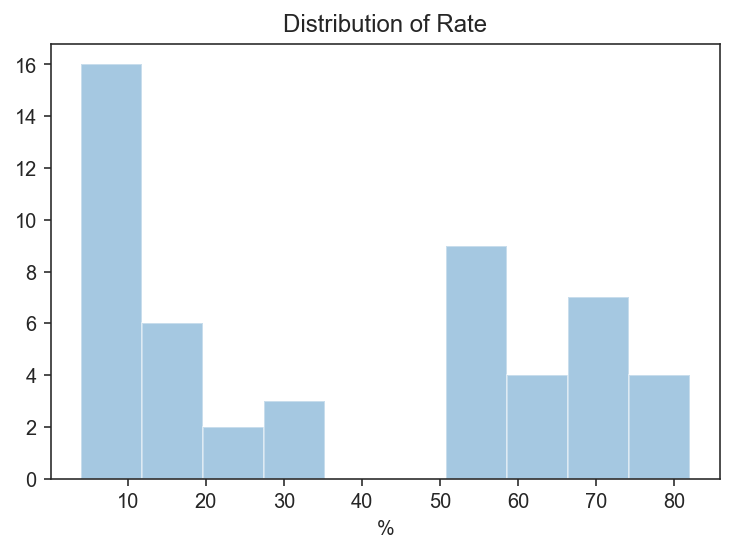

In [13]:
sns.distplot(sat['Rate'], kde=False, bins=10, axlabel='%').set_title('Distribution of Rate')
plt.show()

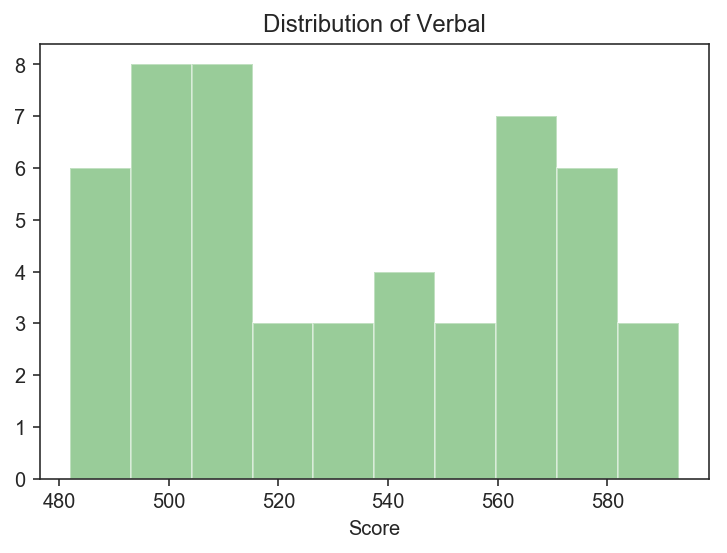

In [14]:
sns.distplot(sat['Verbal'], kde=False, color='g', bins=10, axlabel='Score').set_title('Distribution of Verbal')
plt.show()

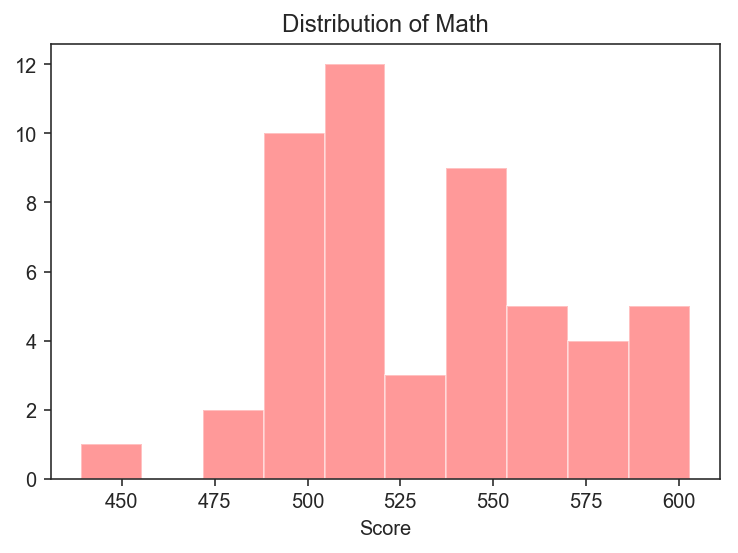

In [15]:
sns.distplot(sat['Math'], kde=False, color='r', bins=10, axlabel='Score').set_title('Distribution of Math')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


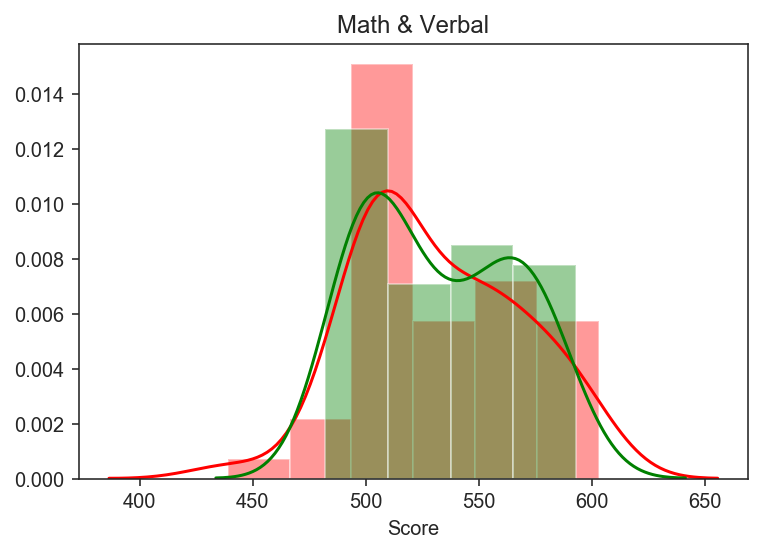

In [16]:
sns.distplot(sat['Math'], color='r', label='Math', axlabel='Score').set_title('Math & Verbal')
sns.distplot(sat['Verbal'], color='g', label='Verbal', axlabel='Score')
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

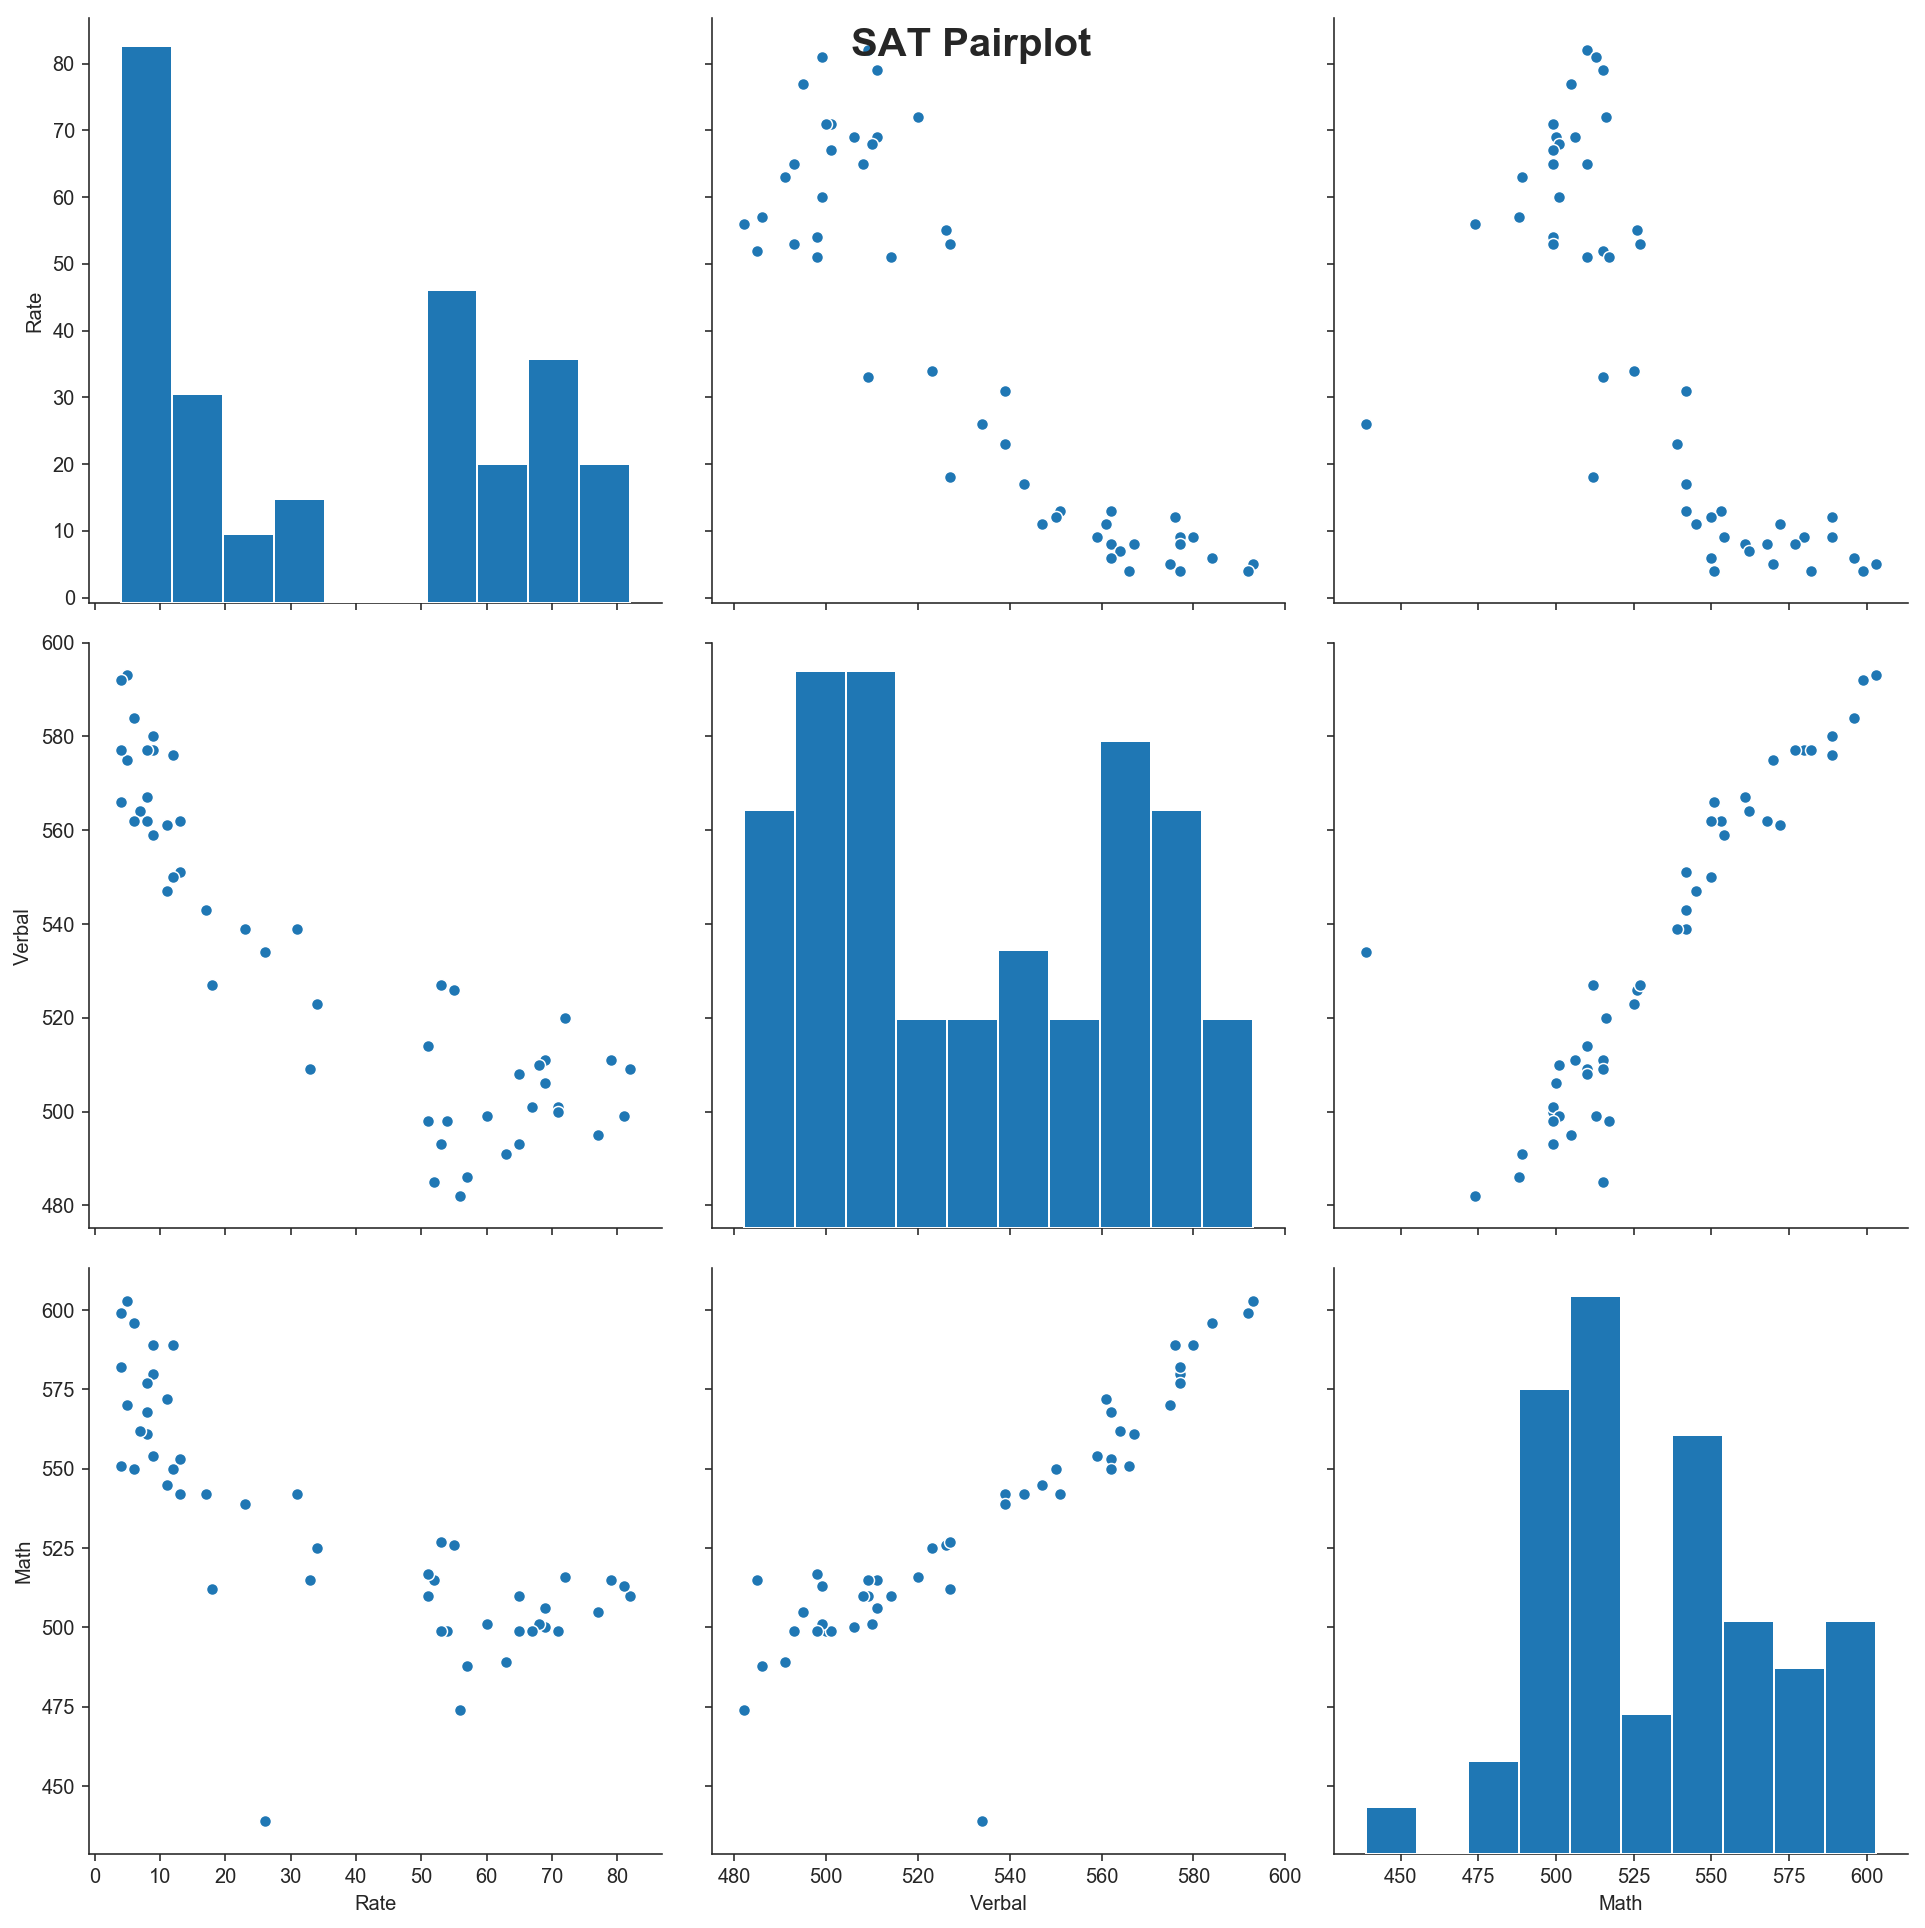

In [17]:
sns.pairplot(sat, height=4.5)
plt.suptitle('SAT Pairplot', fontsize=20, fontweight='bold')
plt.show()

#### The pairplot chart illustrates the following:
#### - Distribution (histogram) of Rate, Verbal and Math
#### - Pair-wise relationship (scatterplot) of all combinations of numeric variables

#### - It appears that strong positive linear relationship exists between Math and Verbal scores
#### - It appears that there are some levels of inverse relationship between Rate-Verbal and Rate-Math.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

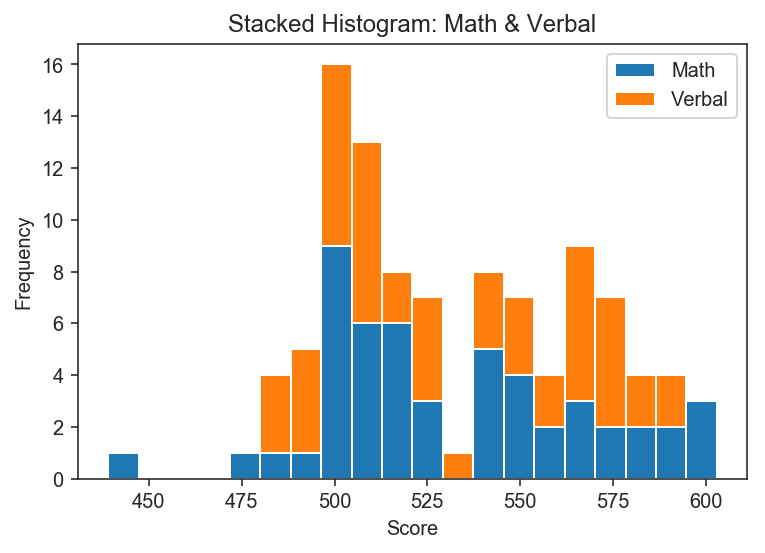

In [18]:
sat_subset = sat.loc[:,['Math', 'Verbal']]
sat_subset.plot.hist(stacked=True, bins=20, title='Stacked Histogram: Math & Verbal')
plt.xlabel('Score')
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

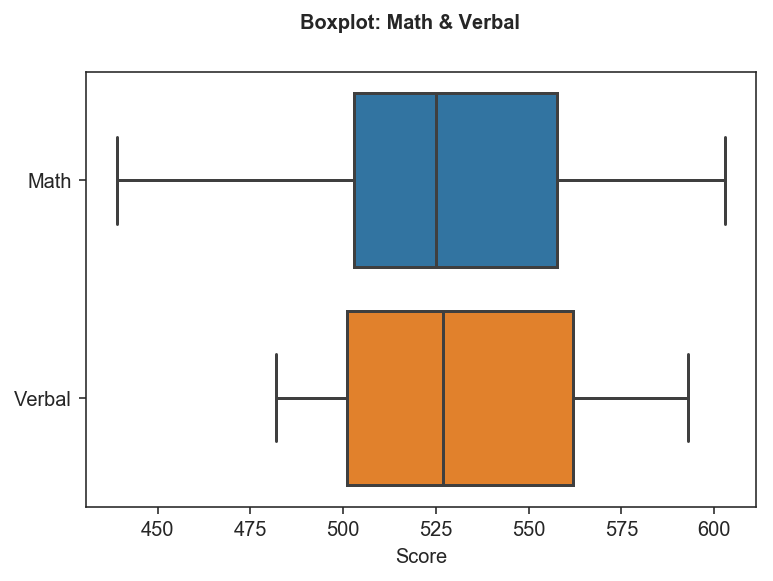

In [19]:
sns.boxplot(data=sat_subset, orient='h')
plt.suptitle('Boxplot: Math & Verbal', fontsize=10, fontweight='bold')
plt.xlabel('Score')
plt.show()

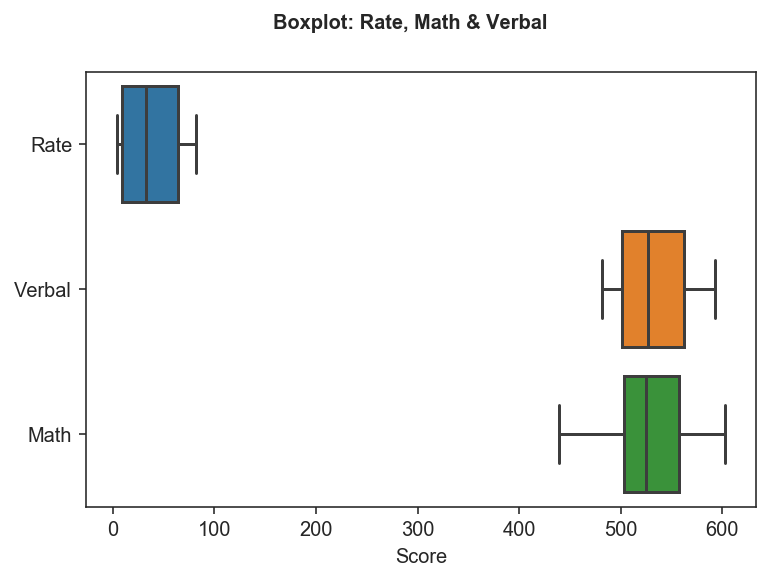

In [20]:
sns.boxplot(data=sat, orient='h')
plt.suptitle('Boxplot: Rate, Math & Verbal', fontsize=10, fontweight='bold')
plt.xlabel('Score')
plt.show()

### My answer:
#### A boxplot illustrates multiple things in a single view:
##### - min and max
##### - 50th and 75th percentiles
##### - outliers
##### - how symetrical the data is
##### - skewness (judging from whether which side of the whiskers is longer)
##### Plotting Rate alongside Math and Verbal would make comparison difficult because the scale of the values in Rate is very different from Verbal and Math

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


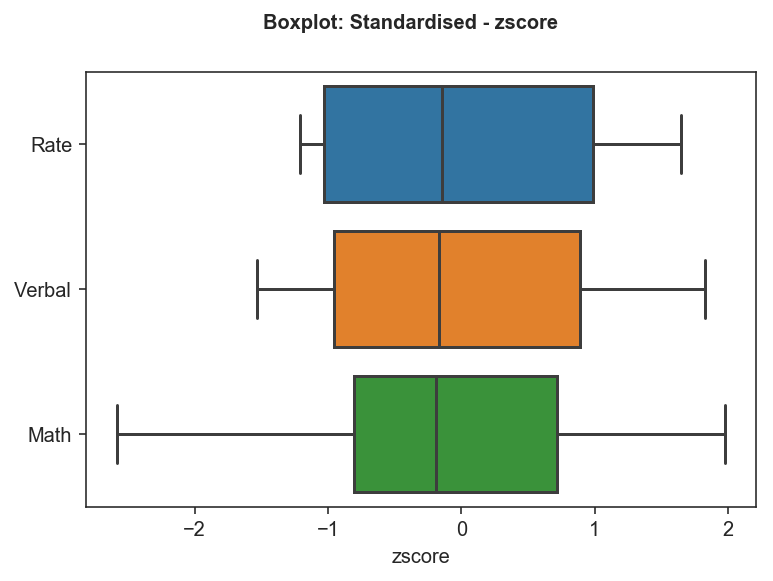

In [21]:
# standardising the values of Rate, Verbal and Math to zscore would provide a sensible looking boxplot of all variables
sat_zscore = pd.DataFrame(stats.zscore(sat.drop(columns='State')))
sat_zscore.columns = ['Rate', 'Verbal', 'Math']

sns.boxplot(data=sat_zscore, orient='h')
plt.suptitle('Boxplot: Standardised - zscore', fontsize=10, fontweight='bold')
plt.xlabel('zscore')
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [22]:
print('Average verbal score:', np.mean(sat['Verbal']))
verbal_above_avg = sat[sat['Verbal'] > np.mean(sat['Verbal'])]
print('Number of states with verbal scores above total average:', len(verbal_above_avg))
print('Verbal scores are slightly skewed to the right with 27 values above the mean')
verbal_above_avg

Average verbal score: 532.5294117647059
Number of states with verbal scores above total average: 24
Verbal scores are slightly skewed to the right with 27 values above the mean


,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [23]:
print('Median verbal score:', np.median(sat['Verbal']))
verbal_above_median = sat[sat['Verbal'] > np.median(sat['Verbal'])]
print('Number of states with verbal scores above median:', len(verbal_above_median))
verbal_above_median

Median verbal score: 527.0
Number of states with verbal scores above median: 24


,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [24]:
sat['Score Diff'] = sat['Verbal'] - sat['Math']
sat.head()

,State,Rate,Verbal,Math,Score Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [25]:
# get 10 top states with math score greater than verbal
mathbetterthanverbal = sat.sort_values('Score Diff')
mathbetterthanverbal['Rank'] = mathbetterthanverbal['Score Diff'].rank(method='min', ascending=True)
mathbetterthanverbal = mathbetterthanverbal[mathbetterthanverbal['Rank'] <= 10]
mathbetterthanverbal

,State,Rate,Verbal,Math,Score Diff,Rank
21,HI,52,485,515,-30,1.0
23,CA,51,498,517,-19,2.0
1,NJ,81,499,513,-14,3.0
33,IL,12,576,589,-13,4.0
44,WI,6,584,596,-12,5.0
36,MI,11,561,572,-11,6.0
3,NY,77,495,505,-10,7.0
47,IA,5,593,603,-10,7.0
37,MN,9,580,589,-9,9.0
49,ND,4,592,599,-7,10.0


In [26]:
# get 10 top states with verbal score greater than math
verbalbetterthanmath = sat.sort_values('Score Diff', ascending=False)
verbalbetterthanmath['Rank'] = verbalbetterthanmath['Score Diff'].rank(method='min', ascending=False)
verbalbetterthanmath = verbalbetterthanmath[verbalbetterthanmath['Rank'] <= 10]
verbalbetterthanmath

,State,Rate,Verbal,Math,Score Diff,Rank
27,OH,26,534,439,95,1.0
50,MS,4,566,551,15,2.0
29,WV,18,527,512,15,2.0
45,AR,6,562,550,12,4.0
31,TN,13,562,553,9,5.0
9,VA,68,510,501,9,5.0
32,NM,13,551,542,9,5.0
16,DC,56,482,474,8,8.0
8,ME,69,506,500,6,9.0
41,OK,8,567,561,6,9.0


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


Correlation:


,Rate,Verbal,Math,Score Diff
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Score Diff,-0.098671,0.044527,-0.395574,1.000000


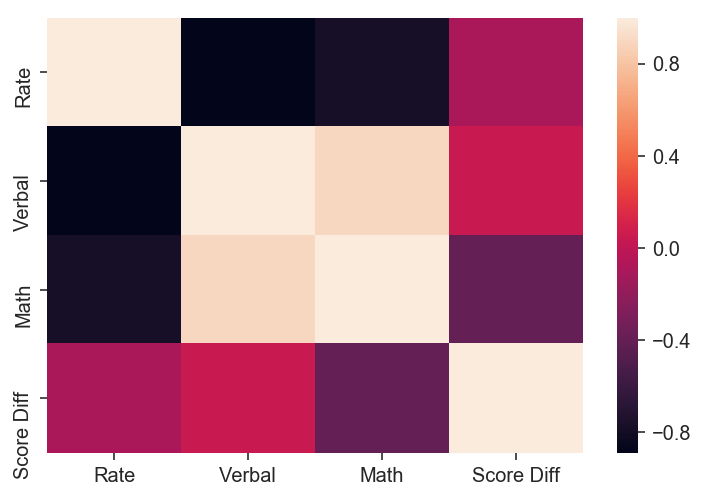

In [27]:
print('Correlation:')
sns.heatmap(sat.corr())
sat.corr()

#### My observations:
##### - Strong negative correlation exist between Rate-Verbal and Rate-Math which suggest that as Rate increases Verbal and Math scores will decrease
##### - Strong positive correlation exists between Verbal-Math which suggests that Verbal and Math scores tend to trend in the same direction

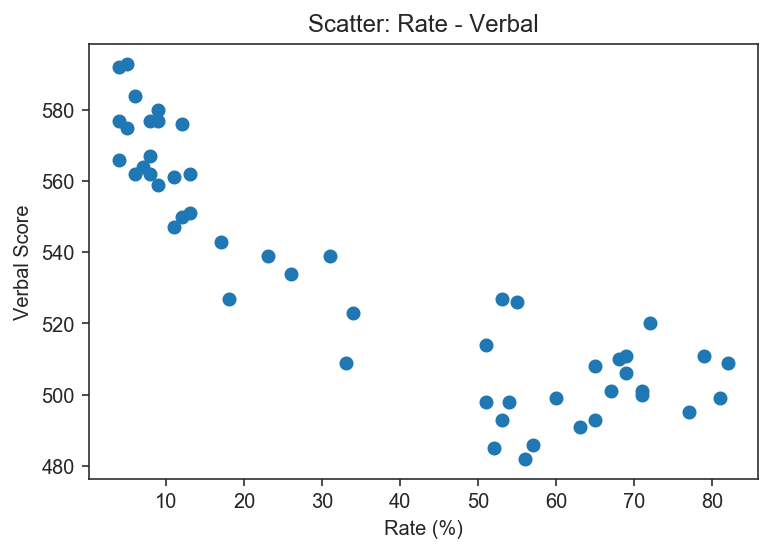

In [28]:
# two clusters: high rate/low verbal; low rate/high verbal
plt.scatter(sat['Rate'], sat['Verbal'])
plt.title("Scatter: Rate - Verbal")
plt.xlabel("Rate (%)")
plt.ylabel("Verbal Score")
plt.show()

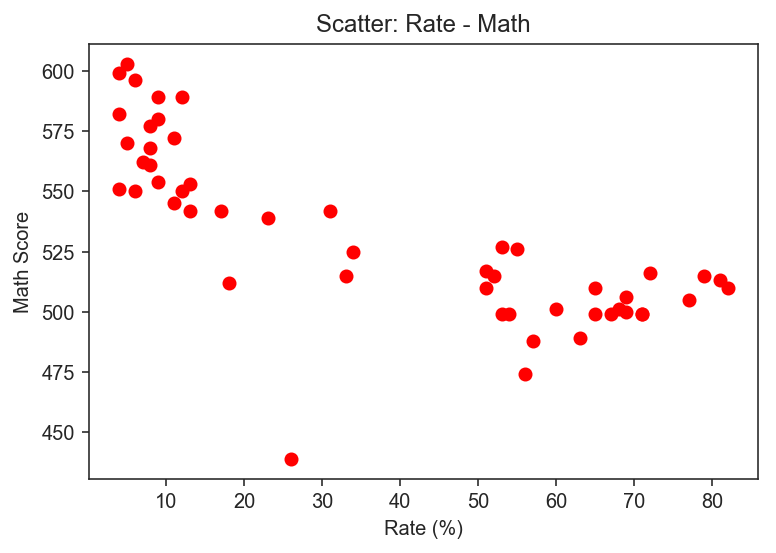

In [29]:
# one noticeable outlier
# two clusters: low rate/high math; high rate/low math
plt.scatter(sat['Rate'], sat['Math'], c='r')
plt.title("Scatter: Rate - Math")
plt.xlabel("Rate (%)")
plt.ylabel("Math Score")
plt.show()

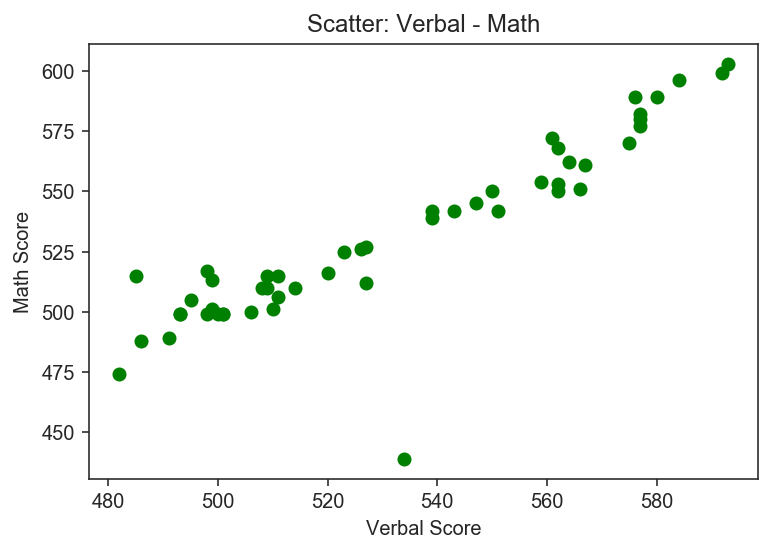

In [30]:
# one noticeable outlier
# linearity is quite obvious
plt.scatter(sat['Verbal'], sat['Math'], c='g')
plt.title("Scatter: Verbal - Math")
plt.xlabel("Verbal Score")
plt.ylabel("Math Score")
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [31]:
sat.describe()

,Rate,Verbal,Math,Score Diff
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


#### count: number of values/rows
#### mean: mean/average of all the values in each variable
#### std: standard deviation of each variable
#### min: minimum value of each variable
#### 25%: 25th percentile of each variable
#### 50%: 50th percentile or median of each variable
#### 75%: 75th percentile of each variable
#### max: maximum value of each variable

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.

Answer: While the values in both matrices represent the strength of relationship between each pair of variables, covariance values are not scaled to a range of -1 and 1. Correlation coefficients, however, is scaled such that a value of 0 represents no relationship, value closer to -1 indicates strong negative relationship and a value closer to 1 indicate strong positive relationship. These scaled values can be considered as a standardised way of looking at relationships between variables when variables have very different values and range. 
2. What is the process to convert the covariance into the correlation?

Answer: Mathematically, correlation can be derived by dividing covariance with the product of standard deviation of two variables.
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

When values of variables possess different range, using a covariance matrix would not allow you to compare between two variables with different range of values. Hence, correlation matrix is preferred.

Covariance:


,Rate,Verbal,Math,Score Diff
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Score Diff,-43.06,23.529412,-227.370196,250.899608


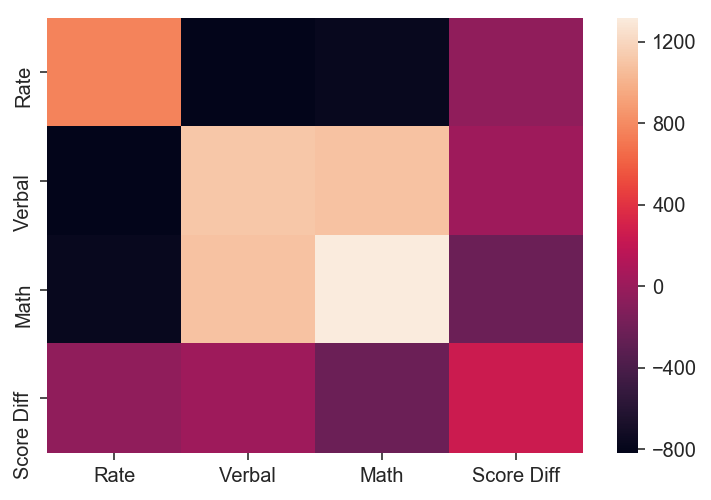

In [32]:
print('Covariance:')
sns.heatmap(sat.cov())
sat.cov()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [33]:
drug = pd.read_csv('drug-use-by-age.csv')
drug.columns=['age',
              'number_of_users',
              'alcohol_use_percent',
              'alcohol_freq_median',
              'marijuana_use_percent',
              'marijuana_freq_median',
              'cocaine_use_percent',
              'cocaine_freq_median',
              'crack_use_percent',
              'crack_freq_median',
              'heroin_use_percent',
              'heroin_freq_median',
              'hallucinogen_use_percent',
              'hallucinogen_freq_median',
              'inhalant_use_percent',
              'inhalent_freq_median',
              'painreleiver_use_percent',
              'painreleiver_freq_median',
              'oxycontin_use_percent',
              'oxycontin_freq_median',
              'tranquilizer_use_percent',
              'tranquilizer_freq_median',
              'stimulant_use_percent',
              'stimulant_freq_median',
              'meth_use_percent',
              'meth_freq_median',
              'sedative_use_percent',
              'sedative_freq_median'
             ]
drug

,age,number_of_users,alcohol_use_percent,alcohol_freq_median,marijuana_use_percent,marijuana_freq_median,cocaine_use_percent,cocaine_freq_median,crack_use_percent,crack_freq_median,...,oxycontin_use_percent,oxycontin_freq_median,tranquilizer_use_percent,tranquilizer_freq_median,stimulant_use_percent,stimulant_freq_median,meth_use_percent,meth_freq_median,sedative_use_percent,sedative_freq_median
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [34]:
# columns which are expected to be int/float, '-' is the reason for them to be objects instead.
# replace all '-' with 0. then convert to numeric
col = drug.columns
for c in col:
    if c != 'age':    
        if drug[c].dtype == 'object':
            drug[c] = drug[c].str.replace('-','0')
            drug[c] = pd.to_numeric(drug[c])

In [35]:
# verify correct data types for each column
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                         17 non-null object
number_of_users             17 non-null int64
alcohol_use_percent         17 non-null float64
alcohol_freq_median         17 non-null float64
marijuana_use_percent       17 non-null float64
marijuana_freq_median       17 non-null float64
cocaine_use_percent         17 non-null float64
cocaine_freq_median         17 non-null float64
crack_use_percent           17 non-null float64
crack_freq_median           17 non-null float64
heroin_use_percent          17 non-null float64
heroin_freq_median          17 non-null float64
hallucinogen_use_percent    17 non-null float64
hallucinogen_freq_median    17 non-null float64
inhalant_use_percent        17 non-null float64
inhalent_freq_median        17 non-null float64
painreleiver_use_percent    17 non-null float64
painreleiver_freq_median    17 non-null float64
oxycontin_use_percent       17 non-n

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [36]:
# begin with summary statistics
drug.describe()

,number_of_users,alcohol_use_percent,alcohol_freq_median,marijuana_use_percent,marijuana_freq_median,cocaine_use_percent,cocaine_freq_median,crack_use_percent,crack_freq_median,heroin_use_percent,...,oxycontin_use_percent,oxycontin_freq_median,tranquilizer_use_percent,tranquilizer_freq_median,stimulant_use_percent,stimulant_freq_median,meth_use_percent,meth_freq_median,sedative_use_percent,sedative_freq_median
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [37]:
# see the unique values of age
drug['age'].unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [38]:
# create 2 subsets: 1 for use_percent and another for freq_median
list_use = []
for col in drug.columns:
    if 'use_percent' in col:
        list_use.append(col)

drug_use = drug.loc[:,list_use]


list_freq = []
for col in drug.columns:
    if 'freq_median' in col:
        list_freq.append(col)

drug_freq = drug.loc[:,list_freq]

In [39]:
# re-categorise age group
# below_21, 21-34, 35-49, 50-64, 65+

def set_agecat(row):
    if row["age"] == "12":
        return "21-"
    elif row["age"] == "13":
        return "21-"
    elif row['age'] == '14':
        return '21-'
    elif row['age'] == '15':
        return '21-'
    elif row['age'] == '16':
        return '21-'
    elif row['age'] == '17':
        return '21-'
    elif row['age'] == '18':
        return '21-'
    elif row['age'] == '19':
        return '21-'
    elif row['age'] == '20':
        return '21-'
    elif row['age'] == '21':
        return '21-34'
    elif row['age'] == '22-23':
        return '21-34'
    elif row['age'] == '24-25':
        return '21-34'
    elif row['age'] == '26-29':
        return '21-34'
    elif row['age'] == '30-34':
        return '21-34'
    elif row['age'] == '22-23':
        return '21-34'
    else:
        return row["age"]

drug = drug.assign(age_cat = drug.apply(set_agecat, axis=1))
drug.head()

,age,number_of_users,alcohol_use_percent,alcohol_freq_median,marijuana_use_percent,marijuana_freq_median,cocaine_use_percent,cocaine_freq_median,crack_use_percent,crack_freq_median,...,oxycontin_freq_median,tranquilizer_use_percent,tranquilizer_freq_median,stimulant_use_percent,stimulant_freq_median,meth_use_percent,meth_freq_median,sedative_use_percent,sedative_freq_median,age_cat
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0,21-
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,21-
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,21-
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,21-
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,21-


In [40]:
# group by age category
drug_grouped = drug.groupby('age_cat').mean().round().sort_values('age_cat')\
    .drop(columns='number_of_users').reset_index()

drug_grouped

,age_cat,alcohol_use_percent,alcohol_freq_median,marijuana_use_percent,marijuana_freq_median,cocaine_use_percent,cocaine_freq_median,crack_use_percent,crack_freq_median,heroin_use_percent,...,oxycontin_use_percent,oxycontin_freq_median,tranquilizer_use_percent,tranquilizer_freq_median,stimulant_use_percent,stimulant_freq_median,meth_use_percent,meth_freq_median,sedative_use_percent,sedative_freq_median
0,21-,38.0,17.0,20.0,34.0,2.0,5.0,0.0,6.0,0.0,...,1.0,12.0,3.0,15.0,2.0,8.0,0.0,28.0,0.0,12.0
1,21-34,82.0,52.0,25.0,58.0,4.0,6.0,0.0,10.0,1.0,...,1.0,22.0,4.0,9.0,3.0,10.0,1.0,31.0,0.0,18.0
2,35-49,75.0,52.0,10.0,48.0,2.0,15.0,0.0,48.0,0.0,...,0.0,12.0,2.0,6.0,1.0,24.0,0.0,104.0,0.0,10.0
3,50-64,67.0,52.0,7.0,52.0,1.0,36.0,0.0,62.0,0.0,...,0.0,5.0,1.0,10.0,0.0,24.0,0.0,30.0,0.0,104.0
4,65+,49.0,52.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,364.0,0.0,0.0,0.0,15.0


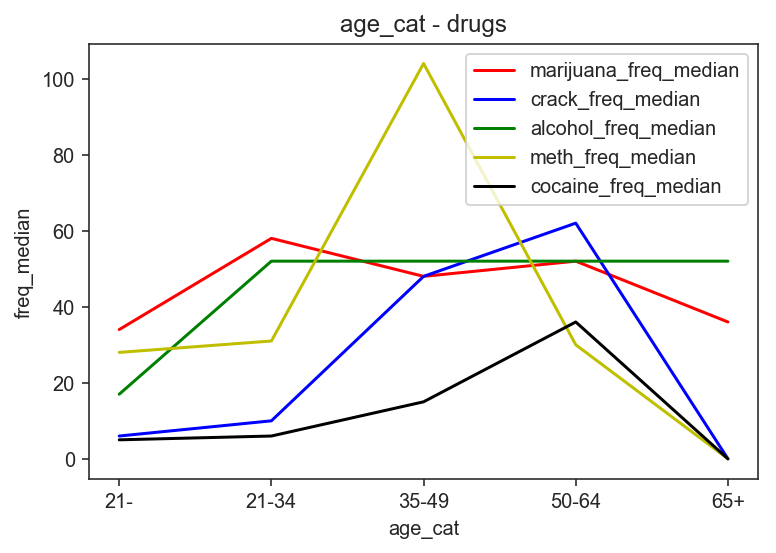

In [41]:
# check out age_cat trend of each drugs' freq_median
plt.plot(drug_grouped['age_cat'], drug_grouped['marijuana_freq_median'], c='r')
plt.plot(drug_grouped['age_cat'], drug_grouped['crack_freq_median'], c='b')
plt.plot(drug_grouped['age_cat'], drug_grouped['alcohol_freq_median'], c='g')
plt.plot(drug_grouped['age_cat'], drug_grouped['meth_freq_median'], c='y')
plt.plot(drug_grouped['age_cat'], drug_grouped['cocaine_freq_median'], c='k')
plt.title("age_cat - drugs")
plt.xlabel("age_cat")
plt.ylabel("freq_median")
plt.legend()
plt.show()

In [42]:
# correlation matrix of drug_use
drug_use.corr()

,alcohol_use_percent,marijuana_use_percent,cocaine_use_percent,crack_use_percent,heroin_use_percent,hallucinogen_use_percent,inhalant_use_percent,painreleiver_use_percent,oxycontin_use_percent,tranquilizer_use_percent,stimulant_use_percent,meth_use_percent,sedative_use_percent
alcohol_use_percent,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana_use_percent,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine_use_percent,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack_use_percent,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin_use_percent,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen_use_percent,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant_use_percent,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
painreleiver_use_percent,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin_use_percent,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929
tranquilizer_use_percent,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618


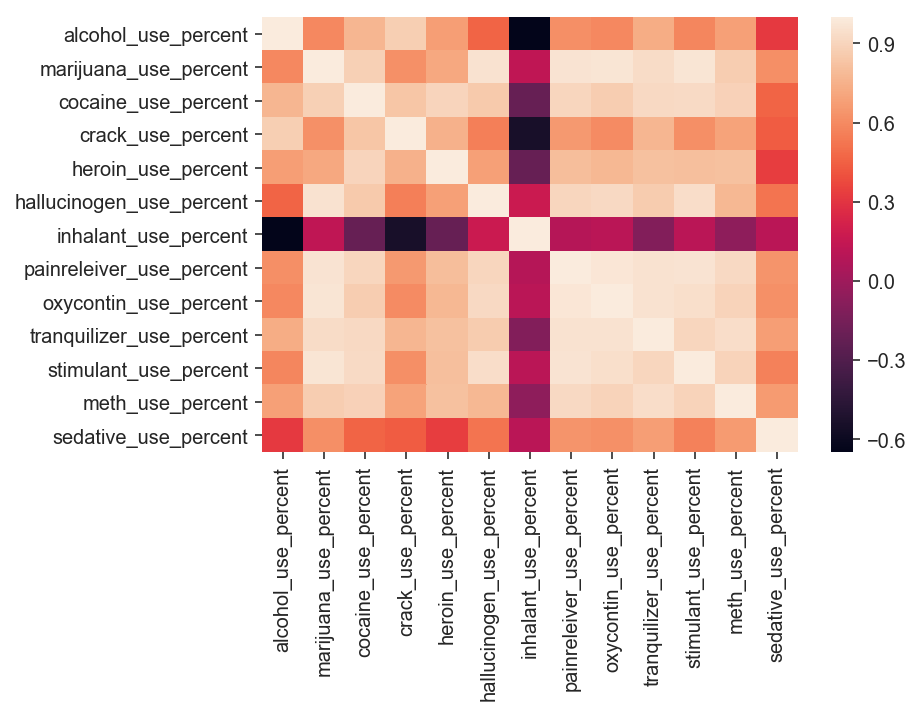

In [43]:
sns.heatmap(drug_use.corr())

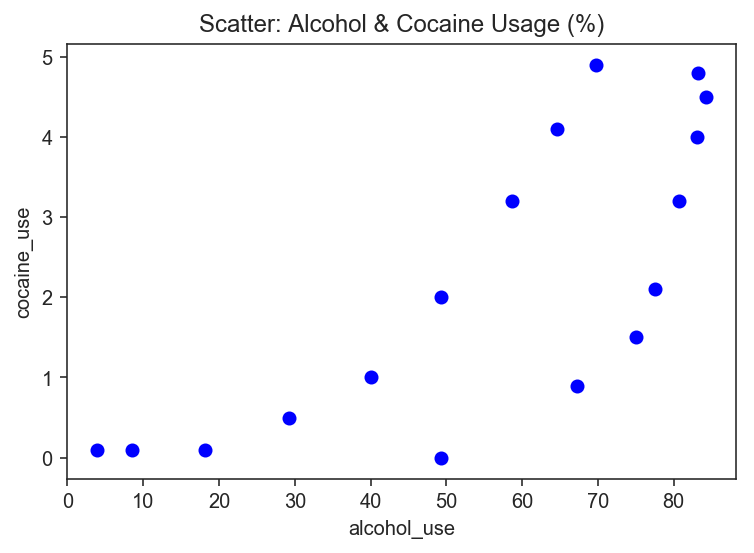

In [44]:
# scatter plot of alcohol/cocaine
plt.scatter(drug_use['alcohol_use_percent'], drug_use['cocaine_use_percent'], c='b')
plt.title("Scatter: Alcohol & Cocaine Usage (%)")
plt.xlabel("alcohol_use")
plt.ylabel("cocaine_use")
plt.show()

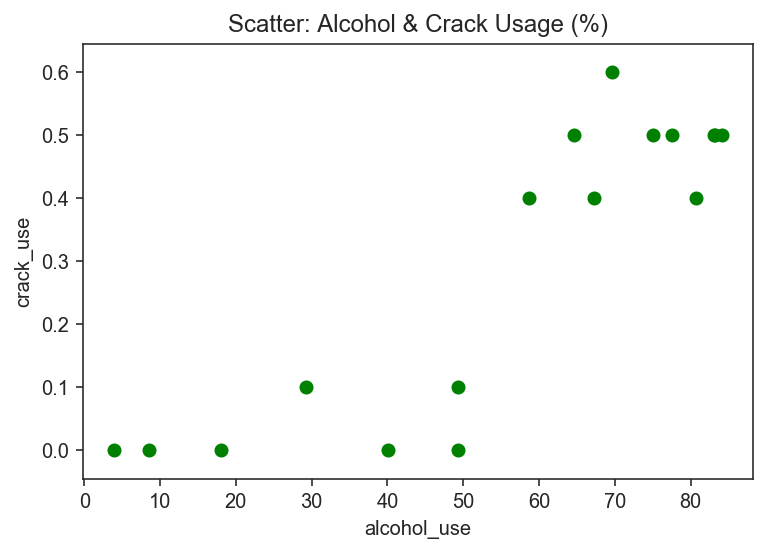

In [45]:
# scatter plot of alcohol/crack
plt.scatter(drug_use['alcohol_use_percent'], drug_use['crack_use_percent'], c='g')
plt.title("Scatter: Alcohol & Crack Usage (%)")
plt.xlabel("alcohol_use")
plt.ylabel("crack_use")
plt.show()

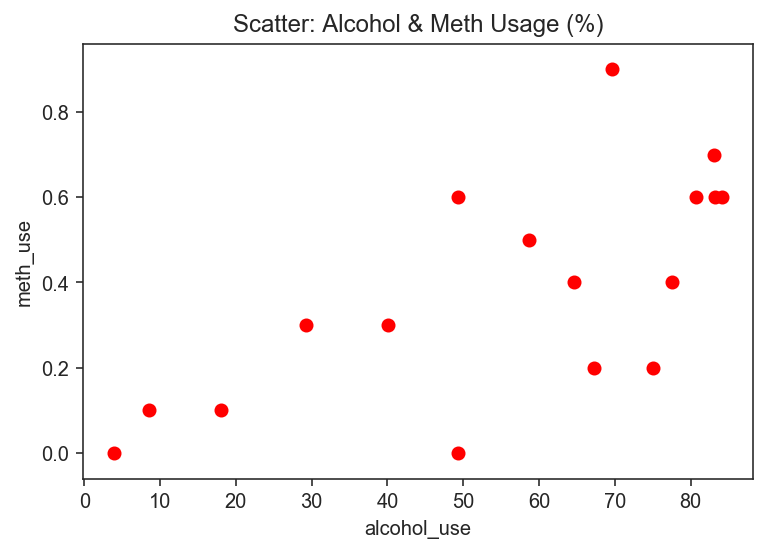

In [46]:
# scatter plot of alcohol/meth
plt.scatter(drug_use['alcohol_use_percent'], drug_use['meth_use_percent'], c='r')
plt.title("Scatter: Alcohol & Meth Usage (%)")
plt.xlabel("alcohol_use")
plt.ylabel("meth_use")
plt.show()

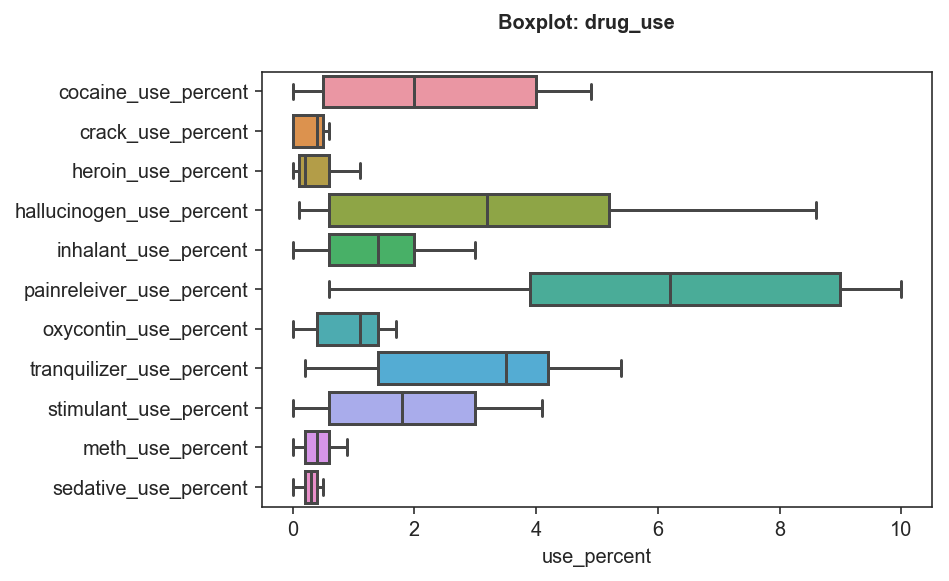

In [47]:
# looking at all drugs usage in drug_use
sns.boxplot(data = drug_use.drop(columns=['alcohol_use_percent','marijuana_use_percent']), orient='h')
plt.suptitle('Boxplot: drug_use', fontsize=10, fontweight='bold')
plt.xlabel('use_percent')
plt.show()

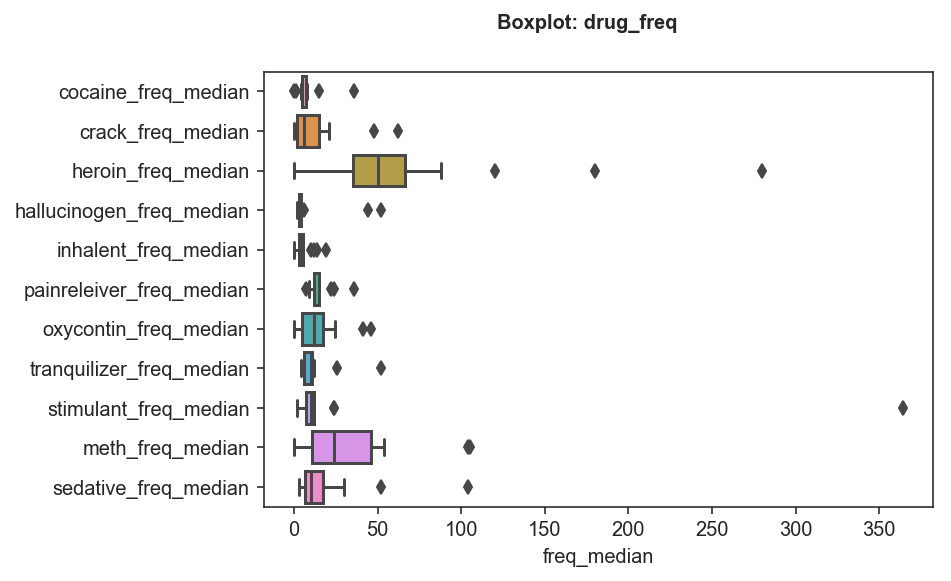

In [48]:
# looking at all drugs median frequency in drug_freq
sns.boxplot(data = drug_freq.drop(columns=['alcohol_freq_median','marijuana_freq_median']), orient='h')
plt.suptitle('Boxplot: drug_freq', fontsize=10, fontweight='bold')
plt.xlabel('freq_median')
plt.show()

### Findings from drug dataset:

#### Many of the drugs tend to peak in usage% and usage frequency around the 21-34 and 35-49 brackets.

#### From the boxplots, one is able to tell that several drug usage stand out from the rest - painreleiver/hallucinogen/tranquilizer/cocaine/stimulant. Heroin and meth frequency is also higher than other drug frequencies.

#### As i looked into the correlation of alcohol usage versus other common/infamous hard drugs, i found that it has high positive correlation with crack (0.88), cocaine (0.77), heroin (0.67) and meth (0.68). While correlation does not suggest causation, it might be worth considering using alcohol usage as a gauge for drug usage.

#### In addition, as i looked into the correlation of alcohol usage versus 'soft drugs' like marijuana, tranquilizer and painreleiver, their correlations are quite significant and positive too. However, if we consider that those drugs also provide comfort/relief to individuals with physical/psychological issues (as would alcohol), we could draw a candid assumption from the dataset that alcohol and those drugs all provide similar effects to users.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [49]:
# alcohol and marijuana (median frequency) has strong positive correlation of 0.82 with a very small p-value
stats.pearsonr(drug_freq['alcohol_freq_median'], drug_freq['marijuana_freq_median'])

(0.8187685027986856, 5.8443759819067435e-05)

In [50]:
# alcohol and marijuana (usage) has semi strong positive correlation of 0.59 with p-value of 0.01
stats.pearsonr(drug_use['alcohol_use_percent'], drug_use['marijuana_use_percent'])

(0.5941650600365184, 0.011899695149154673)

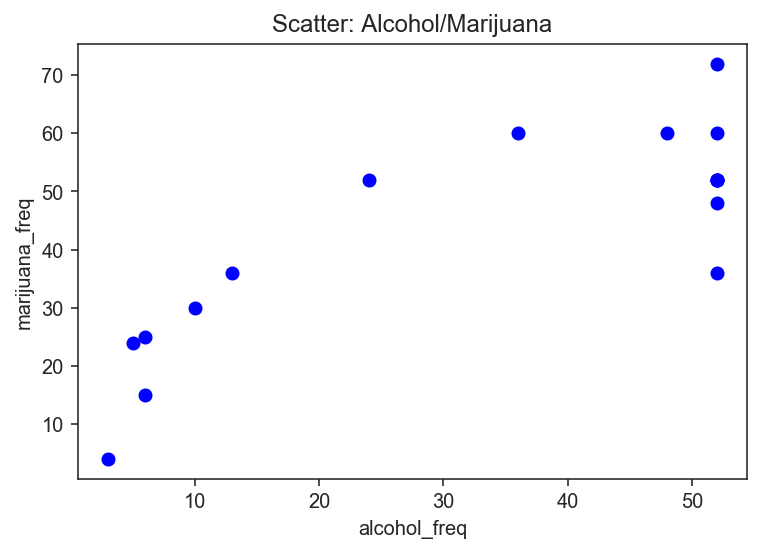

In [51]:
# alcohol vs marijuana (median frequency) seems quite linear
plt.scatter(drug_freq['alcohol_freq_median'], drug_freq['marijuana_freq_median'], c='b')
plt.title("Scatter: Alcohol/Marijuana")
plt.xlabel("alcohol_freq")
plt.ylabel("marijuana_freq")
plt.show()

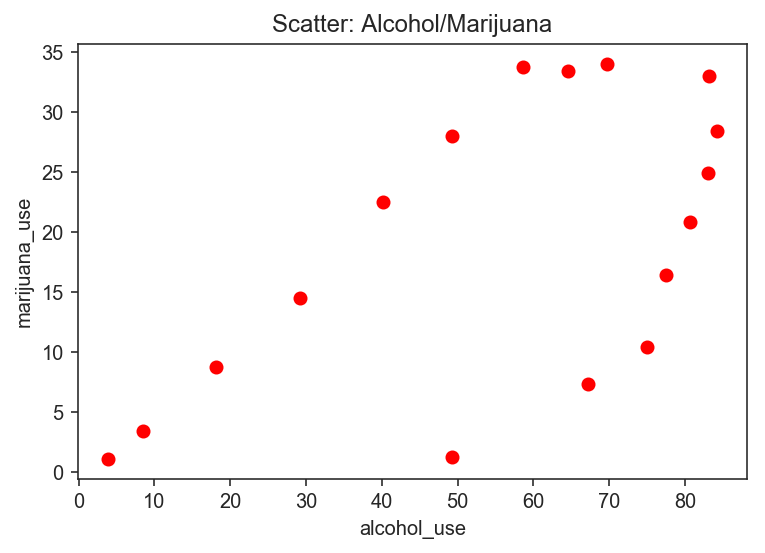

In [52]:
# alcohol vs marijuana (usage) not quite linear
plt.scatter(drug_use['alcohol_use_percent'], drug_use['marijuana_use_percent'], c='r')
plt.title("Scatter: Alcohol/Marijuana")
plt.xlabel("alcohol_use")
plt.ylabel("marijuana_use")
plt.show()

**Report**
### Null Hypothesis:
#### There is no linear relationship between alcohol consumption and marijuana consumption.

### Alternative Hypothesis:
#### There is linear correlation between alcohol and marijuana consumption (i.e. people who consume alcohol to get 'high' tend to consume marijuana to achieve the same effect).

### Significance level of test = 5%

### Description:
#### Having already split the dataset into two dataframes (one with all the usage columns, another with all the freq_median columns). Compute correlation matrices to check for pearson correlation between alcohol and marijuana. Plot scatterplots of the pair to check for linearity.

### Findings:
#### Alcohol usage in percent has a strong positive correlation with marijuana usage in percent (r=0.82, p-value close to 0) and the pair is seemingly linear. Alcohol median frequency has a semi strong positive correlation with marijuana median frequency (r=0.59, p-value=0.01) and there are some levels of linearity between the pair. In conclusion, there is sufficient statistical evidence to reject the null hypothesis and to suggest that alcohol and marijuana do have a positive correlation

...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [53]:
# create remove rate from sat and look at descriptive stats
sat_out = sat.drop(columns=['Rate', 'Score Diff'])
sat_out.describe()

,Verbal,Math
count,51.000000,51.000000
mean,532.529412,531.843137
std,33.360667,36.287393
min,482.000000,439.000000
25%,501.000000,503.000000
50%,527.000000,525.000000
75%,562.000000,557.500000
max,593.000000,603.000000


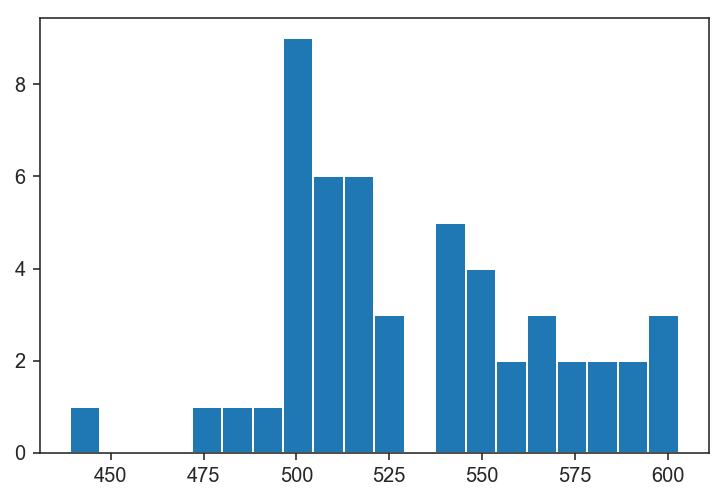

In [54]:
# plot distribution
plt.hist(sat_out['Math'], bins=20)
plt.show()

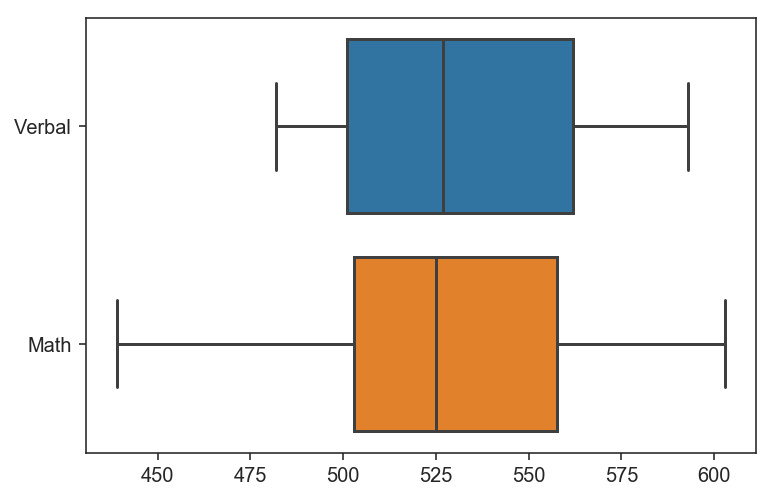

In [55]:
sns.boxplot(data=sat_out, orient='h')
plt.show()

#### From the boxplot, we can see that there are no outliers.
#### Double check with manual calculation.

In [56]:
iqr_verbal = stats.iqr(sat_out['Verbal'])
iqr_math = stats.iqr(sat_out['Math'])
print('IQR Verbal:',iqr_verbal, 'IQR Math:',iqr_math)

IQR Verbal: 61.0 IQR Math: 54.5


In [57]:
verbal_median = np.median(sat_out['Verbal'])
math_median = np.median(sat_out['Math'])
print('verbal median:',verbal_median, 'math median:',math_median)

verbal median: 527.0 math median: 525.0


In [58]:
# outliers would lie outside of 1.5xIQR

In [59]:
# no outliers detected using IQR too
math_outliers = sat_out[(sat_out['Math'] < 1.5*iqr_math) & (sat_out['Math'] > 1.5*iqr_math)]
math_outliers

,State,Verbal,Math


#### Comments: Outliers exist if we define them to be 1.5x of std away from the mean. However, i thought 1.5x of std to be too lenient and we would be losing some valuable data if its defined that way.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [60]:
print('Spearman Correlation:', stats.spearmanr(sat[['Verbal']], sat[['Math']]))
print('Pearson Correlation', stats.pearsonr(sat[['Verbal']], sat[['Math']]))

Spearman Correlation: SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)
Pearson Correlation (array([0.89990932]), array([2.73557935e-19]))


#### Spearman gave a smaller p-value as compared to Pearson
#### in Spearman correlation, each of the values in the two variables are ranked according in comparison to the other values in the variable. To calculate the coefficient, we take 1 minus the sum of the squared difference (d) multiplied by 6 divided by the number of observations 'n' raised to the power of 3 less 'n'.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [61]:
sat['rate_percentile'] = [stats.percentileofscore(sat['Rate'], r) for r in sat['Rate']]
sat[sat['State'] == 'CA']
#The first step of calculating the spearman rank correlation is actually to compute the percentile rank
# of each value

,State,Rate,Verbal,Math,Score Diff,rate_percentile
23,CA,51,498,517,-19,55.882353


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

#### 1. Percentile scoring might be useful to sieve out outliers when other techniques are unable to identify outliers. Users can choose to exclude values in the 5th and 95th percentiles

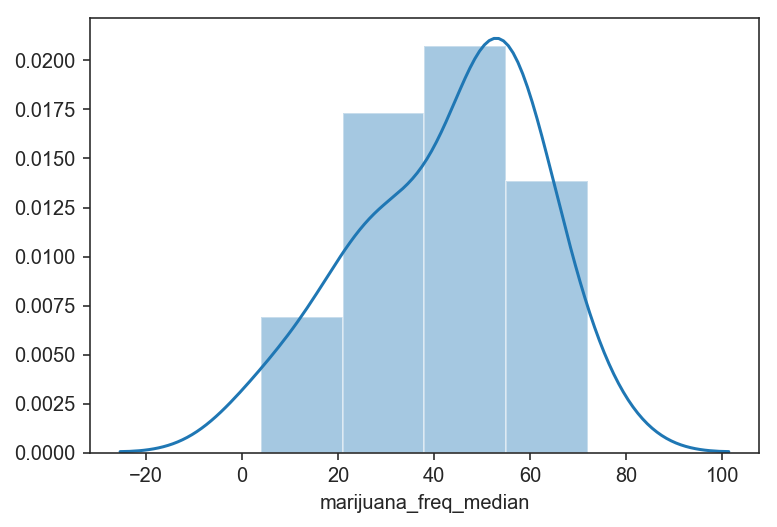

In [62]:
# use alcohol_freq_median from drug_freq
sns.distplot(drug_freq['marijuana_freq_median'])

In [63]:
# get values in percentile
marijuana_percentile = [stats.percentileofscore(drug_freq['marijuana_freq_median'], r) for r in drug_freq['marijuana_freq_median']]


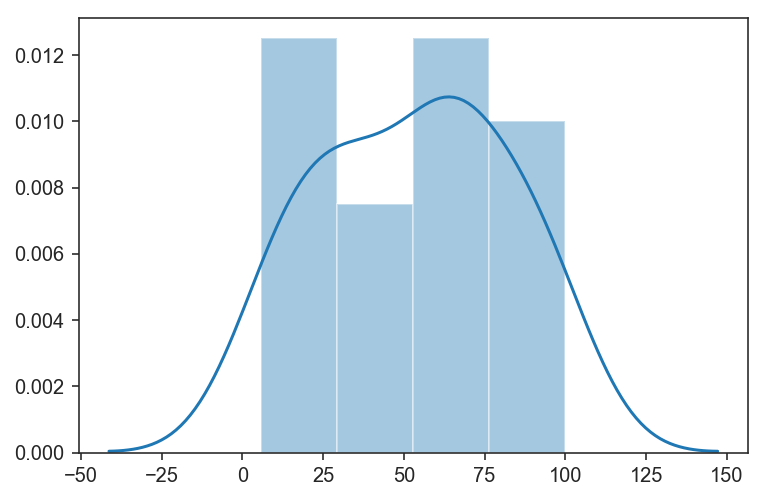

In [64]:
sns.distplot(marijuana_percentile)


#### 4. Comparing the two distributions, we are able to see that 'marijuana_freq_median' becomes redistributed within the range of 0% and 100% after percentile scoring is applied. The distribution also becomes relatively more normal.
